### File for creating "preceding  metrics" plots for predictions using the RF model I trained ...
## Europe.

Updated 8/28/2025 ... This time, new file to just do vertical GPH cross sections

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

Open and pre-process ellipse metrics. 

In [2]:
##open ellipse metric files
infile = open("../data/ellipse/wind10_redo.p", 'rb') 
wind10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/size10_redo.p", 'rb') 
size10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/ratio10_redo.p", 'rb') 
rat10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/ephi10_redo.p", 'rb') 
ephi10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/cenlat10_redo.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/cenlon10_redo.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("../data/gph/NA_gph_weightedANOM_100.p", 'rb') 
gph = pickle.load(infile)
infile.close()

infile = open("../data/pv/CAP_pvu_weightedANOM_350.p", 'rb') 
pv = pickle.load(infile)
infile.close()

In [3]:
wind10.shape

(63, 183)

In [4]:
#remove leap year
##CHANGE IF NOT EXTENDED DATAQ BACK TO 120
wind10 = np.delete(wind10[:62],[151],1)
rat10 = np.delete(rat10[:62],[151],1)
cenlat10 = np.delete(cenlat10[:62],[151],1)
cenlon10 = np.delete(cenlon10[:62],[151],1)
size10 = np.delete(size10[:62],[151],1)
ephi10 = np.delete(ephi10[:62],[151],1)

In [5]:
wind10.shape

(62, 182)

In [6]:
shift = 14
#this is used to change the start date from October 19 to November 2nd... and just reduce the overall time observed.
#0 if no change. 

idx = 135

In [7]:
wind10 = wind10[:,19+shift:168]
rat10 = rat10[:,19+shift:168]
cenlat10 = cenlat10[:,19+shift:168]
cenlon10 = cenlon10[:,19+shift:168]
size10 = size10[:,19+shift:168]
ephi10 = ephi10[:,19+shift:168]
gph = gph[:62,19+shift:168]
pv = pv[:62,19+shift:168]

In [8]:
wind10.shape

(62, 135)

In [9]:
#remove NaNs
##CHANGE IF NOT EXTENDED DATA
test_comp = []
indices = np.isnan(wind10)
for i in range(0,62):
    for j in range(0,idx):
        if indices[i,j] != False:
            print(i)
            print(j)
            print("True")
            wind10[i,j] = 0
            rat10[i,j] = 0
            cenlat10[i,j] = 0
            cenlon10[i,j] = 0
            size10[i,j] = 0
            ephi10[i,j] = 0
            if i >= 57:
                test_comp.append((i,j))
            else:
                continue

6
124
True
13
112
True
17
71
True
18
95
True
19
127
True
19
128
True
19
129
True
24
127
True
24
128
True
24
129
True
24
130
True
24
131
True
24
132
True
24
133
True
24
134
True
27
109
True
27
110
True
27
111
True
27
112
True
27
113
True
27
114
True
27
115
True
28
133
True
28
134
True
29
118
True
29
127
True
29
128
True
29
129
True
29
130
True
29
131
True
29
132
True
29
133
True
29
134
True
36
132
True
39
121
True
39
122
True
39
123
True
39
124
True
39
125
True
39
126
True
39
127
True
39
128
True
39
129
True
39
130
True
39
131
True
39
132
True
39
133
True
39
134
True
41
107
True
41
108
True
41
109
True
41
110
True
41
111
True
41
112
True
41
113
True
48
134
True
49
89
True
49
94
True
49
95
True
49
96
True
49
97
True
49
98
True
49
99
True
49
100
True
49
101
True
49
102
True
49
103
True
49
104
True
49
105
True
49
106
True
49
107
True
49
108
True
49
109
True
49
110
True
49
111
True
49
112
True
49
113
True
49
114
True
49
115
True
49
116
True
49
117
True
49
118
True
56
134
True
58
114
True


In [10]:
input = np.empty((62,idx,8))

In [11]:
def daily_anomaly(target):
    dailymean = np.nanmean(target,axis=1)
    anom = np.zeros_like(target)
    for t in np.arange(target.shape[1]):
         anom[:,t] = target[:,t] - dailymean
    print(anom.shape)
    return anom; 

In [12]:
input[:,:,0] = daily_anomaly(wind10[:,:])
input[:,:,1] = daily_anomaly(rat10[:,:])
input[:,:,2] = daily_anomaly(cenlat10[:,:])
input[:,:,3] = daily_anomaly(cenlon10[:,:])
input[:,:,4] = daily_anomaly(size10[:,:])
input[:,:,5] = daily_anomaly(ephi10[:,:])
input[:,:,6] = daily_anomaly(gph[:,:])
input[:,:,7] = daily_anomaly(pv[:,:])

(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)


In [13]:
input2 = np.empty((62,idx,4))

In [14]:
input2[:,:,2] = cenlat10[:62,:]
input2[:,:,1] = cenlon10[:62,:]
input2[:,:,3] = wind10[:62,:]
input2[:,:,0] = gph[:62,:]

Now that the assembly is done ... We can plot. lol.

In [15]:
##open indice files
infile = open("posXtest_eur14.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("FposXtest_eur14.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("negXtest_eur14.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("FnegXtest_eur14.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

In [16]:
#bring in GPH data. 
infile = open("../data/gph/1959_gphforNAO.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
GPH_14= gph_input[52:62, 19+shift:168, :, :].reshape((10, 135, 37, 180)) 
infile.close()

#print("U Wind shape: ",U_14.shape)
print("GPH shape: ",GPH_14.shape)

lon = np.arange(0, 362, 2)
print("Len longitudes: ", len(lon))

lev = np.array([1., 2., 3., 5., 7., 10., 20., 30., 50., 70., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 
                450., 500., 550., 600., 650., 700., 750., 775., 800., 825., 850., 875., 900., 925., 950., 975., 1000.])
print("Len levels: ", len(lev))

GPH shape:  (10, 135, 37, 180)
Len longitudes:  181
Len levels:  37


### These few cells will be for making box plots instead lol. 

It is important to keep in mind that there are also just proportionally less pos and neg temp extremes left as I increase the classification criterion (i.e., +1.5 std) ... SO regardless of whether they are proportionally more events, there are still less to choose from ... if that makes sense?

In [17]:
##reduce input to just the testing data
nolag_Xtest = input2[52:,:,:]
nolag_Xtest.shape

####now I wanna make these plots SO ... I am adding an index column on to X_test ... full version. 
ranges = np.array([x for x in range(0,idx*10,1)])
ranges = ranges.reshape(10,idx) 
ranges.shape

(10, 135)

In [19]:
##Correct Positive Events
posXtest_set = set(posXtest)

pos_corr_events = []
pos_corr_total_events = []
GPH_cpos = []

for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        if date_index not in posXtest_set:
            continue
        elif date_index in posXtest_set:
            features = nolag_Xtest[i, j, :]
            pos_corr_events.extend(features)

            GPH_cpos.extend(GPH_14[i,j,:,:])
            
            pos_corr_total_events.append(0)
        
##reshape
Tpos = np.array(pos_corr_events).reshape(len(pos_corr_total_events),4)
GPH_cpos = np.array(GPH_cpos).reshape(len(pos_corr_total_events),37,180)
print(Tpos.shape)

(230, 4)


In [20]:
##FALSE Positive Events
FposXtest_set = set(FposXtest)

Fpos_corr_events = []
Fpos_corr_total_events = []

GPH_Fpos = []


for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        if date_index not in FposXtest_set:
            continue
        Fpos_corr_total_events.append(0)
        Fpos_corr_events.extend(nolag_Xtest[i,j,:])
        GPH_Fpos.extend(GPH_14[i,j,:,:])
        
##reshape
Fpos = np.array(Fpos_corr_events).reshape(len(Fpos_corr_total_events),4)
GPH_Fpos = np.array(GPH_Fpos).reshape(len(Fpos_corr_total_events),37,180)
print(Fpos.shape)

(73, 4)


In [21]:
##Correct Negative Events
negXtest_set = set(negXtest)

neg_corr_events = []
neg_corr_total_events = []

GPH_cneg = []

for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        if date_index not in negXtest_set:
            continue
        neg_corr_total_events.append(0)
        neg_corr_events.extend(nolag_Xtest[i,j,:])
        GPH_cneg.extend(GPH_14[i,j,:,:])
        
##reshape
Tneg = np.array(neg_corr_events).reshape(len(neg_corr_total_events),4)
GPH_cneg = np.array(GPH_cneg).reshape(len(neg_corr_total_events),37,180)
print(Tneg.shape)

(227, 4)


In [22]:
##FALSE Negative Events
FnegXtest_set = set(FnegXtest)

Fneg_corr_events = []
Fneg_corr_total_events = []
GPH_Fneg = []

for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        if date_index not in FnegXtest_set:
            continue
        Fneg_corr_total_events.append(0)
        Fneg_corr_events.extend(nolag_Xtest[i,j,:])
        GPH_Fneg.extend(GPH_14[i,j,:,:])
        
##reshape
Fneg = np.array(Fneg_corr_events).reshape(len(Fneg_corr_total_events),4)
GPH_Fneg = np.array(GPH_Fneg).reshape(len(Fneg_corr_total_events),37,180)
print(Fneg.shape)

(107, 4)


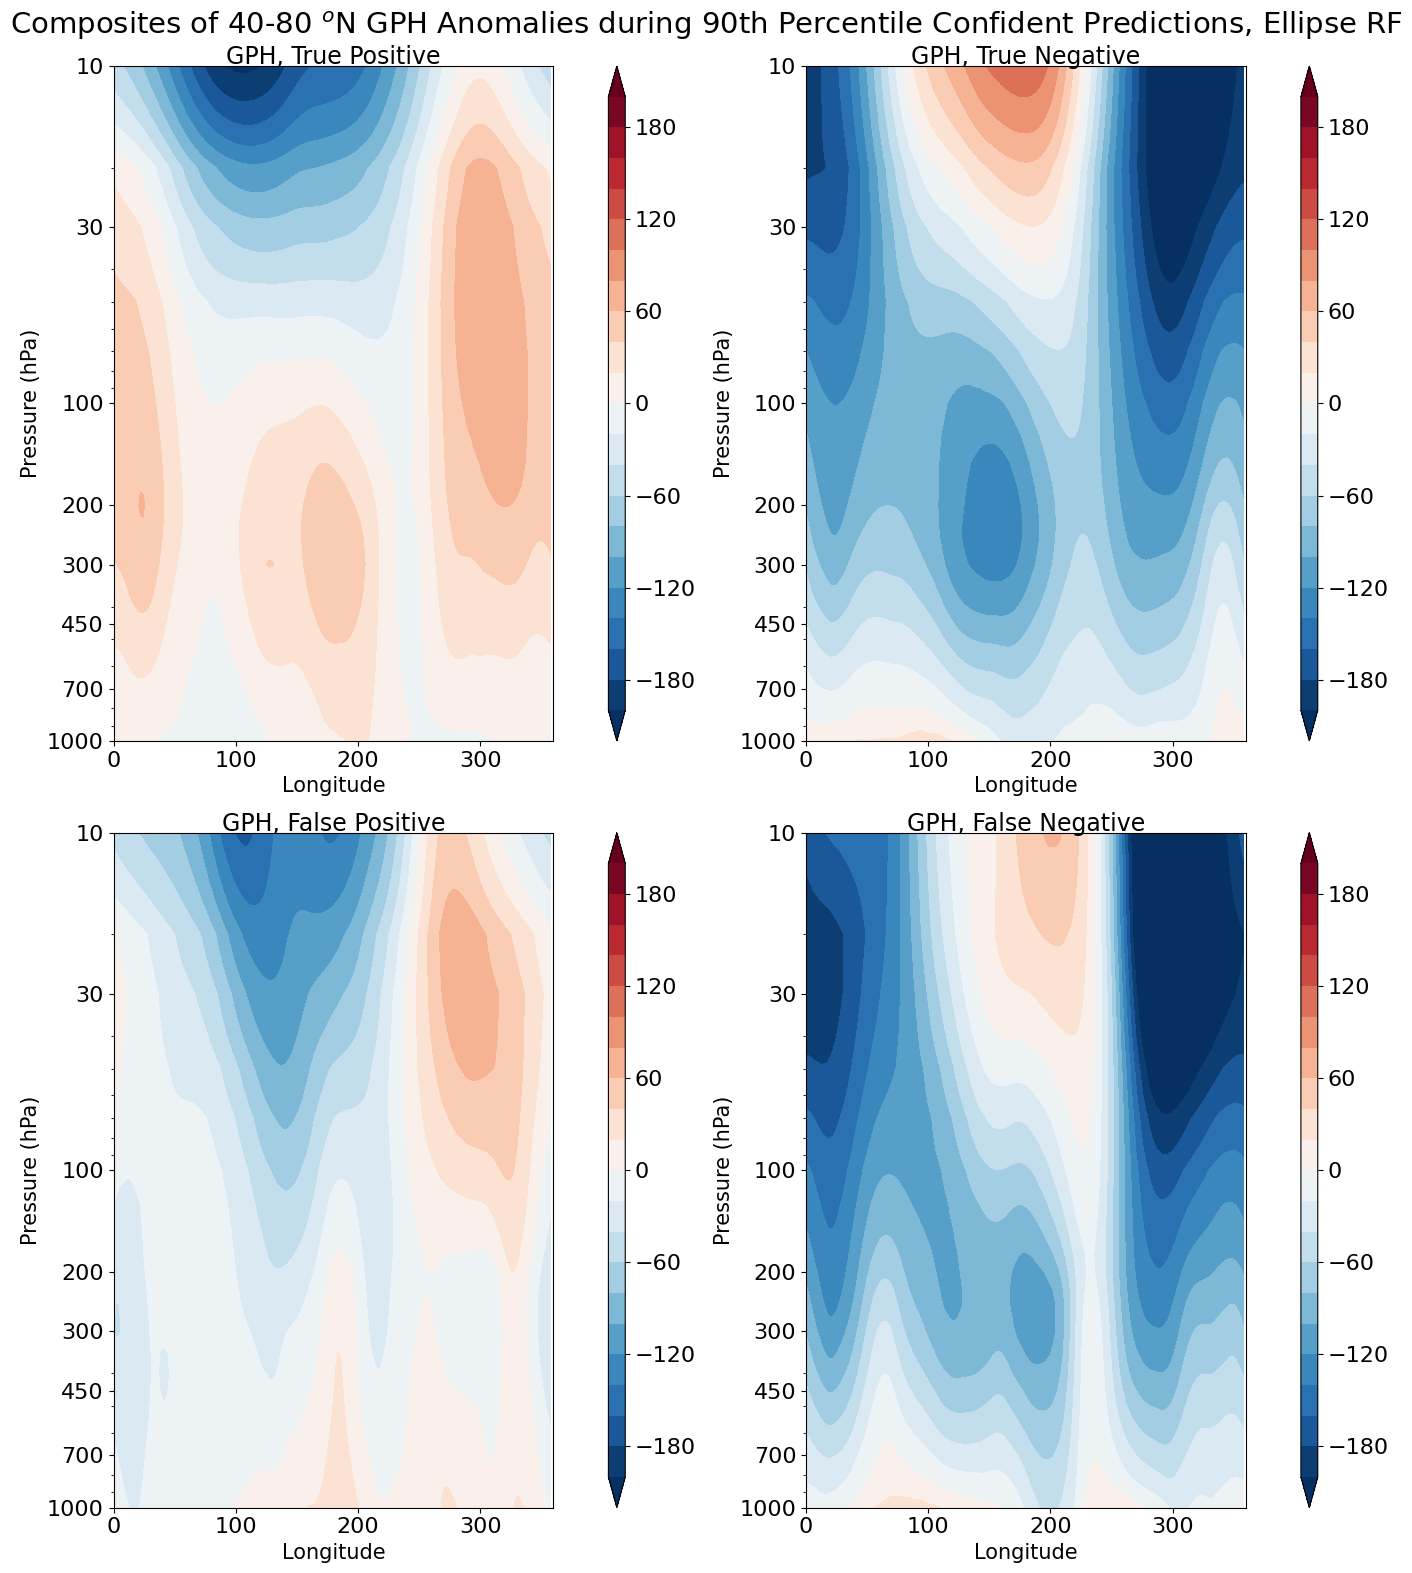

In [30]:
fs = 18
fig, axes = plt.subplots(2, 2, figsize=(14, 16))
plt.suptitle("Composites of 40-80 $^o$N GPH Anomalies during 90th Percentile Confident Predictions, Ellipse RF",fontsize=21)   

titles = ["True Positive", "True Negative", "False Positive", "False Negative",]
data = [GPH_cpos[:,5:],GPH_cneg[:,5:],
        GPH_Fpos[:,5:],GPH_Fneg[:,5:]]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 4):
    color = "RdBu_r"
    # colorbar options:
    
    colorbarMin = -200
    colorbarMax = 200
    colorspace = 20

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title("GPH, "+str(titles[i]), fontsize=fs-1, y=0.99) 

    h = axes[i].contourf(
        lon[:180],
        lev[5:],
        np.nanmean(data[i], axis = 0),
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    axes[i].tick_params(labelsize=fs-2)
    axes[i].set_yscale('log')
    axes[i].invert_yaxis()
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
    axes[i].set_yticks([10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(0, 360)
    axes[i].set_xlabel('Longitude', fontsize=fs-3)

    
plt.tight_layout()
plt.subplots_adjust(top=0.945)
plt.savefig("EllipseRF_vertGPHComp.png",bbox_inches = 'tight')
plt.show()